# Sentinel-2 SNAP Fraction of Absorbed Photosynthetically Active Radiation

In [1]:
import os
import yaml
from munch import munchify

### _Setup configuration and environment_

In [2]:
# define repo name and get root working directory
repo = 'statistical'
root_path = os.getcwd()[ 0 : os.getcwd().find( repo ) + len ( repo )]

# get path to configuration files
cfg_path = os.path.join( root_path, 'cfg' )
cfg_path = os.path.join( cfg_path, 'sentinel-2' )

In [3]:
# get path to configuration files
cfg_path = os.path.join( root_path, 'cfg' )
cfg_path = os.path.join( cfg_path, 'sentinel-2' )
cfg_path

'C:\\Users\\crwil\\Documents\\GitHub\\sentinelhub\\apis\\statistical\\cfg\\sentinel-2'

In [4]:
# get pathname to configuration file
cfg_file = os.path.join( cfg_path, 's2-fapar.yml' )

In [5]:
# print contents of configuration file
with open( cfg_file ) as f:
    print ( f.read() )

request:
    evalscript: |
                //VERSION=3
                function setup() {
                    return {
                        input: [{
                            bands: [
                                "B03",
                                "B04",
                                "B05",
                                "B06",
                                "B07",
                                "B8A",
                                "B11",
                                "B12",
                                "SCL",
                                "CLM",
                                "viewZenithMean",
                                "viewAzimuthMean",
                                "sunZenithAngles",
                                "sunAzimuthAngles",
                                "dataMask"
                            ]
                        }],
                        output: [
                        {
                            id: "stats",
              

In [6]:
# load cfg file using yaml parser
with open( cfg_file, 'r' ) as f:
    config = munchify( yaml.safe_load( f ) )

### _Replicate use case results taken from Sentinel-Hub documentation_

In [7]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon

coords = "[ [ [ 458085.878866, 5097236.833044 ], [ 457813.834156, 5096808.351383 ], [ 457979.897062, 5096313.767184 ],  [ 458146.639373, 5096405.411294 ], [ 458085.878866, 5097236.833044 ] ] ]"

df = pd.DataFrame([["Polygon", coords ]], columns=["type", "coords"])
gdf = gpd.GeoDataFrame( geometry=gpd.GeoSeries( Polygon(eval(df.coords.iloc[0])[0] ) ) )
gdf = gdf.set_crs( 32633 )
gdf

,geometry
0,"POLYGON ((458085.879 5097236.833, 457813.834 5..."


In [8]:
gdf = gdf.to_crs(4326)
bounds = gdf.bounds.values[ 0 ]
cx = (bounds[ 2 ] + bounds[ 0 ]) / 2.0
cy = (bounds[ 3 ] + bounds[ 1 ]) / 2.0
cx, cy

(14.457122499992728, 46.02326499999474)

In [9]:
import folium
m = folium.Map(location=[ cy, cx ], zoom_start=14, tiles='CartoDB positron')

for _, r in gdf.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    geo_j.add_to(m)
m

In [10]:
# define aggregation timeframe
from datetime import datetime
timeframe = { 'start' : datetime.strptime('2020-01-01', '%Y-%m-%d'), 
              'end' : datetime.strptime('2020-12-31', '%Y-%m-%d') }

In [11]:
# create instance of shclient class
from statisticalapi import Client
client = Client( config )

In [12]:
# submit request
gdf = gdf.to_crs( 32633 )
response = { '2020' : client.getStatistics( [ timeframe ], resolution=10, polygons=gdf, interval='P1D' ) }

In [13]:
response[ '2020' ]._dfs[ 0 ]

,id,interval_from,interval_to,stats_fapar_min,stats_fapar_max,stats_fapar_mean,stats_fapar_stDev,stats_fapar_sampleCount,stats_fapar_noDataCount
0,geom_0,2020-01-06,2020-01-07,0.396125,0.629488,0.525421,0.044954,3036,2776
1,geom_0,2020-01-11,2020-01-12,-0.010358,0.123119,0.080123,0.016484,3036,1951
2,geom_0,2020-01-16,2020-01-17,0.498233,0.566548,0.526145,0.016821,3036,3009
3,geom_0,2020-01-21,2020-01-22,0.408990,0.570605,0.502644,0.035595,3036,2997
4,geom_0,2020-02-05,2020-02-06,0.390594,0.547018,0.456229,0.042540,3036,2956
5,geom_0,2020-03-11,2020-03-12,0.190997,0.465712,0.310491,0.045699,3036,1408
6,geom_0,2020-03-16,2020-03-17,0.191355,0.458879,0.335747,0.041804,3036,1238
7,geom_0,2020-03-21,2020-03-22,0.005641,0.372148,0.205493,0.067808,3036,2960
8,geom_0,2020-04-05,2020-04-06,0.218490,0.553039,0.398146,0.047888,3036,1192
9,geom_0,2020-04-10,2020-04-11,0.239529,0.601216,0.415271,0.050554,3036,1192


### _Results extracted from Sentinel-Hub documentation_

{'data': [{'interval': {'from': '2020-01-01T00:00:00Z',
    'to': '2020-01-31T00:00:00Z'},
   'outputs': {'data': {'bands': {'monthly_max_ndvi': {'stats': {'min': 0.4755639135837555,
        'max': 0.881286084651947,
        'mean': 0.6396090604381046,
        'stDev': 0.06844923487502963,
        'sampleCount': 3036,
        'noDataCount': 1192}}}}}},
  {'interval': {'from': '2020-01-31T00:00:00Z', 'to': '2020-03-01T00:00:00Z'},
   'outputs': {'data': {'bands': {'monthly_max_ndvi': {'stats': {'min': 0.3580246865749359,
        'max': 0.8721038103103638,
        'mean': 0.5956351390500386,
        'stDev': 0.07367438999713516,
        'sampleCount': 3036,
        'noDataCount': 1192}}}}}},
  {'interval': {'from': '2020-03-01T00:00:00Z', 'to': '2020-03-31T00:00:00Z'},
   'outputs': {'data': {'bands': {'monthly_max_ndvi': {'stats': {'min': 0.4486735761165619,
        'max': 0.8021259307861328,
        'mean': 0.5871563556072766,
        'stDev': 0.057052289003643133,
        'sampleCount': 3036,
        'noDataCount': 1192}}}}}},
  {'interval': {'from': '2020-03-31T00:00:00Z', 'to': '2020-04-30T00:00:00Z'},
   'outputs': {'data': {'bands': {'monthly_max_ndvi': {'stats': {'min': 0.6692230701446533,
        'max': 0.9151291251182556,
        'mean': 0.8157615211677142,
        'stDev': 0.033218066972707065,
        'sampleCount': 3036,
        'noDataCount': 1192}}}}}},
  {'interval': {'from': '2020-04-30T00:00:00Z', 'to': '2020-05-30T00:00:00Z'},
   'outputs': {'data': {'bands': {'monthly_max_ndvi': {'stats': {'min': 0.8058800101280212,
        'max': 0.9187881350517273,
        'mean': 0.8889683038965989,
        'stDev': 0.012977241049476852,
        'sampleCount': 3036,
        'noDataCount': 1192}}}}}},
  {'interval': {'from': '2020-05-30T00:00:00Z', 'to': '2020-06-29T00:00:00Z'},
   'outputs': {'data': {'bands': {'monthly_max_ndvi': {'stats': {'min': 0.6883189082145691,
        'max': 0.8775584697723389,
        'mean': 0.8231413116488706,
        'stDev': 0.026857728958053807,
        'sampleCount': 3036,
        'noDataCount': 1192}}}}}},
  {'interval': {'from': '2020-06-29T00:00:00Z', 'to': '2020-07-29T00:00:00Z'},
   'outputs': {'data': {'bands': {'monthly_max_ndvi': {'stats': {'min': 0.8329545259475708,
        'max': 0.9370484948158264,
        'mean': 0.9037939229264967,
        'stDev': 0.012790519558688863,
        'sampleCount': 3036,
        'noDataCount': 1192}}}}}},
  {'interval': {'from': '2020-07-29T00:00:00Z', 'to': '2020-08-28T00:00:00Z'},
   'outputs': {'data': {'bands': {'monthly_max_ndvi': {'stats': {'min': 0.7602161169052124,
        'max': 0.9052368998527527,
        'mean': 0.859046490422556,
        'stDev': 0.016254065036794822,
        'sampleCount': 3036,
        'noDataCount': 1192}}}}}},
  {'interval': {'from': '2020-08-28T00:00:00Z', 'to': '2020-09-27T00:00:00Z'},
   'outputs': {'data': {'bands': {'monthly_max_ndvi': {'stats': {'min': 0.7403650879859924,
        'max': 0.8889380693435669,
        'mean': 0.822339247532367,
        'stDev': 0.019577044702359023,
        'sampleCount': 3036,
        'noDataCount': 1192}}}}}},
  {'interval': {'from': '2020-09-27T00:00:00Z', 'to': '2020-10-27T00:00:00Z'},
   'outputs': {'data': {'bands': {'monthly_max_ndvi': {'stats': {'min': 0.6416097283363342,
        'max': 0.8256189227104187,
        'mean': 0.7368144742384923,
        'stDev': 0.02884084473079313,
        'sampleCount': 3036,
        'noDataCount': 1192}}}}}},
  {'interval': {'from': '2020-10-27T00:00:00Z', 'to': '2020-11-26T00:00:00Z'},
   'outputs': {'data': {'bands': {'monthly_max_ndvi': {'stats': {'min': 0.5424679517745972,
        'max': 0.9108409285545349,
        'mean': 0.7069293897671695,
        'stDev': 0.05380689467103403,
        'sampleCount': 3036,
        'noDataCount': 1192}}}}}},
  {'interval': {'from': '2020-11-26T00:00:00Z', 'to': '2020-12-26T00:00:00Z'},
   'outputs': {'data': {'bands': {'monthly_max_ndvi': {'stats': {'min': 0.0,
        'max': 0.14360177516937256,
        'mean': 0.04437006836957318,
        'stDev': 0.026757893384181577,
        'sampleCount': 3036,
        'noDataCount': 1192}}}}}}],
 'status': 'OK'}

<AxesSubplot:xlabel='interval_from'>

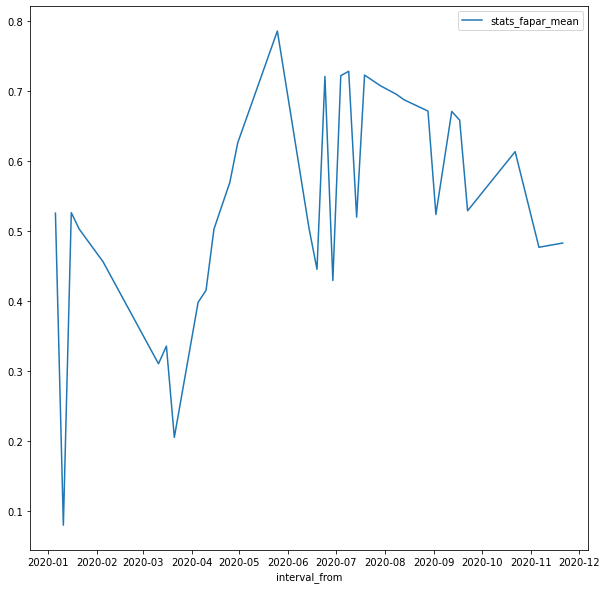

In [14]:
response[ '2020' ]._dfs[ 0 ].plot( figsize=(10,10), x='interval_from', y='stats_fapar_mean')

### _Repeat NDVI Statistical Analysis for 2019_

In [15]:
# define aggregation timeframe
from datetime import datetime
timeframe = { 'start' : datetime.strptime('2019-01-01', '%Y-%m-%d'), 
              'end' : datetime.strptime('2019-12-31', '%Y-%m-%d') }

In [16]:
# submit request
response[ '2019' ] = client.getStatistics( [ timeframe ], resolution=10, polygons=gdf, interval='P1D' )

In [17]:
response[ '2019' ]._dfs[ 0 ]

,id,interval_from,interval_to,stats_fapar_min,stats_fapar_max,stats_fapar_mean,stats_fapar_stDev,stats_fapar_sampleCount,stats_fapar_noDataCount
0,geom_0,2019-01-01,2019-01-02,0.424990,0.658071,0.515590,0.044488,3036,2776
1,geom_0,2019-01-06,2019-01-07,0.362993,0.615133,0.505387,0.039863,3036,2763
2,geom_0,2019-01-11,2019-01-12,0.138044,0.584112,0.338259,0.112645,3036,2659
3,geom_0,2019-02-15,2019-02-16,0.243604,0.502435,0.382224,0.055934,3036,2483
4,geom_0,2019-02-20,2019-02-21,0.273724,0.329161,0.298925,0.014427,3036,3024
5,geom_0,2019-02-25,2019-02-26,0.155122,0.452441,0.271450,0.060467,3036,1751
6,geom_0,2019-03-12,2019-03-13,0.206553,0.490514,0.345735,0.044546,3036,1323
7,geom_0,2019-03-17,2019-03-18,0.041062,0.338765,0.213711,0.100463,3036,3023
8,geom_0,2019-03-22,2019-03-23,0.156552,0.417798,0.292920,0.039505,3036,1321
9,geom_0,2019-04-01,2019-04-02,0.201584,0.503132,0.355681,0.045878,3036,1217


### _Plot Time Series with standard deviation error bars_

In [19]:
for year in [ '2019', '2020' ]:
    response[ year ]._dfs[ 0 ][ 'pos_range' ] = response[ year ]._dfs[ 0 ][ 'stats_fapar_mean' ] + response[ year ]._dfs[ 0 ][ 'stats_fapar_stDev' ]
    response[ year ]._dfs[ 0 ][ 'neg_range' ] = response[ year ]._dfs[ 0 ][ 'stats_fapar_mean' ] - response[ year ]._dfs[ 0 ][ 'stats_fapar_stDev' ]

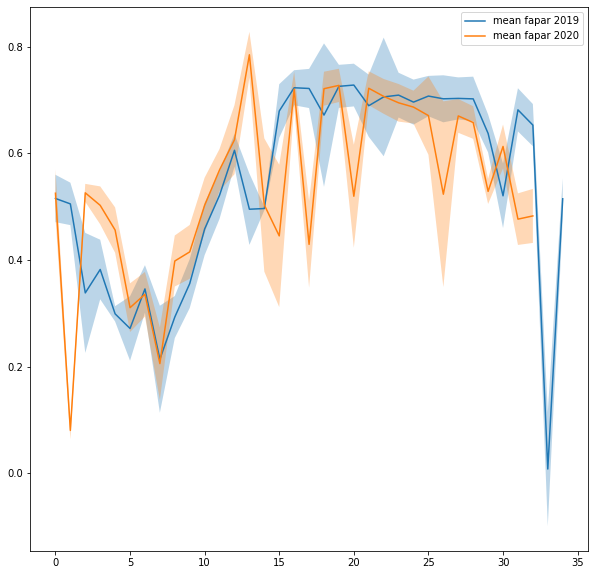

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots( figsize=(10,10) )

for year in [ '2019', '2020' ]:
    response[ year ]._dfs[ 0 ].plot( ax=ax, y='stats_fapar_mean', label=f'mean fapar {year}' )
    ax.fill_between( response[ year ]._dfs[ 0 ].index, response[ year ]._dfs[ 0 ][ 'neg_range' ], response[ year ]._dfs[ 0 ][ 'pos_range' ], alpha=0.3 )